Generate 112 trials (for now 1 only subject)

trials with shock after n seconds change physio signals
trials w\out shock no change in physio

In [1]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import biosppy
from scipy import interpolate

In [2]:
TRIAL_LEN = 6
SHOCK_TIME = 4
AFTER_SHOCK = TRIAL_LEN-SHOCK_TIME
BPM_LOW = list(range(50,70))
BPM_HIGH = list(range(80,110))
DRIFT_RANGE= list(map(lambda x: x/1000.0, range(1, 10, 1)))

SEED = 1234
SAMPLING_RATE_HR = 500
SAMPLING_RATE_EDA = 500
THRESHOLD_BINARY = 2
assert SHOCK_TIME <= TRIAL_LEN

In [3]:
df_hr_raw = pd.read_csv('data_fake/hr/2_hr.csv')

In [16]:
df_raw = df_hr_raw.iloc[[0]]

In [38]:
df_raw.to_numpy().flatten()

array([1.09446326, 1.08239494, 1.05209732, ..., 0.00605049, 0.00466255,
       0.003429  ])

In [60]:
ecg_cleaned = nk.ecg_clean(df_raw.to_numpy().flatten(), sampling_rate=SAMPLING_RATE_HR)

peaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=SAMPLING_RATE_HR, correct_artifacts=True)

# Compute HRV indices

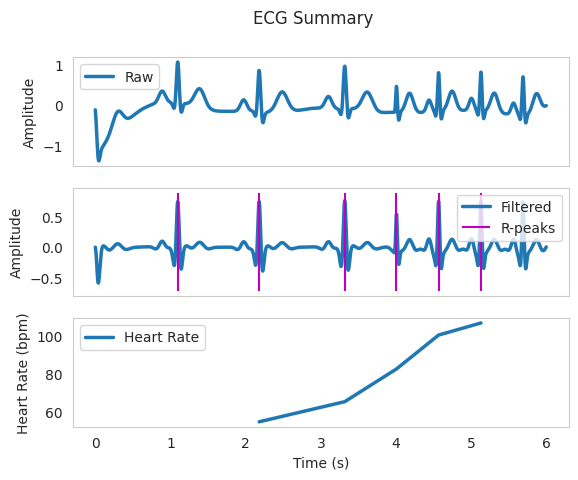

In [62]:
results = biosppy.signals.ecg.ecg(ecg_cleaned, 500,show=False)
t_raw = results[0]
t_hr = results[5]
hr = results[6]

# Interpolate HR values to bring signal back to original size
f = interpolate.interp1d(t_hr, hr, bounds_error=False, fill_value="extrapolate")
tmp_HR = f(t_raw)

fps = int(len(tmp_HR) / t_raw[-1])

In [17]:
from deepemogp import feature_extractor
from deepemogp.signal import physio as physio
from deepemogp import datasets as datasets
from deepemogp.signal import behavior as behavior
import extract_correct_csv
import numpy as np

In [18]:
show= False
TRIAL = 160

In [21]:
valid_subject = ['2','4','10','41','43','44','45','46','47','48','49','50','51','52','53','54','55']

for i in valid_subject:

    f2 = feature_extractor.FE('wavelet', window=(4, 2))
    f3 = feature_extractor.FE('mean', window=(1, 0))

    # definition of the physiological signals to be extracted
    extraction_method_physio = "wavelet"
    if extraction_method_physio == 'wavelet':
        eda_ = physio.EDA(f2)
        hr_ = physio.ECG(f2)
    else:
        eda_ = physio.EDA(f3)
        hr_ = physio.ECG(f3)

    # extraction of the desired data from the dataset
    d = datasets.FEAR(signals={hr_, eda_}, subjects={str(i)})

    for s in d.signals:
        # preprocess ...
        if s.name == 'EDA':
            s.preprocess(show=show, new_fps=500)
            s.feature_ext.extract_feat(s, show=show)
        else:
            if s.name == 'HR':
                #list_hr_test = s.raw[0]['data']
                s.preprocess(show=show, new_fps=500)
                s.feature_ext.extract_feat(s, show=show)

    for sig in d.signals:
        if sig.name == 'EDA':
            eda_data = sig.features
        if sig.name == 'ECG':
            hr_data = sig.features

    eda = np.array(eda_data)
    eda = eda.reshape((TRIAL,int(eda.shape[0]/TRIAL*eda.shape[1])))
    eda = pd.DataFrame(eda)

    hr =np.array(hr_data)
    hr = hr.reshape((TRIAL, int(hr.shape[0]/TRIAL*hr.shape[1])))
    hr = pd.DataFrame(hr)

    eda.to_csv('data_fake/features_4_2/eda/'+str(i)+'.csv', index = False)
    hr.to_csv('data_fake/features_4_2/hr/'+str(i)+'.csv', index = False)
    #pupil_data.to_csv('data_fake/features_4_2/pupil/'+str(i)+'.csv', index = False)


>> Loading EDA for subject 2 and all sessions from dataset FEAR
>> Loading ECG for subject 2 and all sessions from dataset FEAR
>> Processing EDA ...
>> Extracting wavelet features from EDA signal, adopting (4, 2) window ...
>> Loading EDA for subject 4 and all sessions from dataset FEAR
>> Loading ECG for subject 4 and all sessions from dataset FEAR
>> Processing EDA ...
>> Extracting wavelet features from EDA signal, adopting (4, 2) window ...
>> Loading EDA for subject 10 and all sessions from dataset FEAR
>> Loading ECG for subject 10 and all sessions from dataset FEAR
>> Processing EDA ...
>> Extracting wavelet features from EDA signal, adopting (4, 2) window ...
>> Loading ECG for subject 41 and all sessions from dataset FEAR
>> Loading EDA for subject 41 and all sessions from dataset FEAR
>> Processing EDA ...
>> Extracting wavelet features from EDA signal, adopting (4, 2) window ...
>> Loading ECG for subject 43 and all sessions from dataset FEAR
>> Loading EDA for subject 43 a

In [14]:
type(hr_data)

pandas.core.frame.DataFrame

In [13]:
import numpy as np
TRIAL =160

In [14]:
eda = np.array(eda_data)
eda = eda.reshape((TRIAL,int(eda.shape[0]/TRIAL*eda.shape[1])))
eda

array([[-1.70972009e+00, -1.71275408e+00, -1.46390101e+00, ...,
         7.82201640e+01,  7.59231259e+01,  7.51748876e+01],
       [-1.55573352e+00, -1.55969718e+00, -1.35435102e+00, ...,
         8.31744375e+01,  8.15027044e+01,  8.04402049e+01],
       [ 3.20641296e-01,  3.08503599e-01,  8.50521246e-02, ...,
         1.58315170e+02,  1.62855904e+02,  1.49577686e+02],
       ...,
       [-8.94887804e-01, -9.29183700e-01, -8.09123116e-01, ...,
         1.52668033e+02,  1.44915206e+02,  1.35822837e+02],
       [ 3.90842042e+00,  3.92159261e+00,  3.46851859e+00, ...,
         2.77144710e+01,  3.22804996e+01,  3.82494631e+01],
       [-1.05781898e+00, -1.07358693e+00, -1.19639460e+00, ...,
         2.19604353e+02,  2.79637961e+02,  3.00623343e+02]])

[{'data': array([0.        , 0.        , 0.03976462, ..., 3.9082223 , 3.90653679,
         3.90484663]),
  'fps': 500},
 {'data': array([ 0.        ,  0.        , -0.01071368, ...,  1.93523849,
          1.93569382,  1.93614188]),
  'fps': 500},
 {'data': array([0.        , 0.        , 0.0856574 , ..., 0.65782724, 0.65730331,
         0.65677953]),
  'fps': 500},
 {'data': array([0.        , 0.        , 0.0628631 , ..., 2.54806487, 2.54632124,
         2.54457705]),
  'fps': 500},
 {'data': array([0.        , 0.        , 0.00938499, ..., 2.84355937, 2.84294392,
         2.84232272]),
  'fps': 500},
 {'data': array([0.        , 0.        , 0.11882444, ..., 0.29014254, 0.29006588,
         0.28998869]),
  'fps': 500},
 {'data': array([0.        , 0.        , 0.1194995 , ..., 3.45644293, 3.45634142,
         3.45623043]),
  'fps': 500},
 {'data': array([ 0.        ,  0.        , -0.02183077, ...,  0.9651609 ,
          0.96480632,  0.96445036]),
  'fps': 500},
 {'data': array([ 0.        